# Notebook ini merupakan hasil dari kegiatan PythonCourse SEG Universitas Pertamina

## Minggu 2 - Graphical User Interface 

Tkinter merupakan salah satu modul user interface yang ada di python, berikut merupakan contoh sederhana dari penggunaan Tkinter

In [4]:
from tkinter import *
def show_entry_fields():
    print('First name: %s\nLast name: %s' % (e1.get(),e2.get()))

master = Tk()
Label(master, text='First name').grid(row=0)
Label(master, text='Last name').grid(row=1)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)

Button(master, text='Quit', command=master.quit).grid(row=3, column=0, sticky=W, pady=4)
Button(master, text='Show', command=show_entry_fields).grid(row=3, column=1, sticky=W, pady=4)

mainloop( )


First name: Hadyan
Last name: Pratama


Selain itu, tkinter dapat pula digunakan untuk membuat plot, berikut hasilnya
code source : http://www.otak-keren.com/2017/05/grafik-maker-python.html

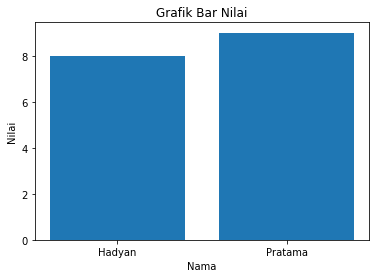

In [3]:
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import messagebox

root = Tk()
root.title('Grafik Maker')

name = []
skor = []

def add():
    try:
        if len(name) == 0:
            nama1 = nama.get()
            name1 = nama1.split(',')
            for i in name1:
                name.append(i)

            skor1 = nilai.get()
            skor2 = skor1.split(",")
            skor3 = [int(i) for i in skor2]
            for x in skor3:
                skor.append(x)
        else:
            messagebox.showwarning('Perhatian !', 'Data Harus Terisi Lengkap dan Berpasangan !')
            return
    except:
        messagebox.showwarning('Perhatian !', 'Data Harus Terisi Lengkap dan Berpasangan !')
        return

    x = range(len(name))
    if a.get() == 1:
        plt.bar(x, skor)
        plt.xticks(x, name)
        plt.xlabel('Nama')
        plt.ylabel('Nilai')
        plt.title('Grafik Bar Nilai')
        plt.show()
    else:
        plt.plot(x, skor)
        plt.xticks(x, name)
        plt.xlabel('Nama')
        plt.ylabel('Nilai')
        plt.title('Grafik Line Nilai')
        plt.show()
    return

def reset():
    nama.delete(0, END)
    nilai.delete(0, END)

    a = []
    while len(name) > 0 and len(skor) > 0:
        q = name.pop()
        v = skor.pop()
        a.append(q)
        a.append(v)
        a.remove(q)
        a.remove(v)
    return

label= Label(root, text='Nama:').grid(row=0, column=0, sticky=E, padx=2)
label1 = Label(root, text='Nilai:').grid(row=1, column=0, sticky=E, padx=2)

nama = Entry(root, width=50)
nama.grid(row=0, column=1, padx=4)
nilai = Entry(root, width=50)
nilai.grid(row=1, column=1, padx=4)

a = IntVar()
bar = Radiobutton(root, text="Grafik Bar", variable=a, value=1)
bar.grid(row=2, column=1, sticky=W)
line = Radiobutton(root, text="Grafik Line", variable=a, value=2)
line.grid(row=2, column=1, sticky=E)

tombol1 = Button(root, text='Tampilkan', width=15, command=add).grid(row=4, columnspan=2, pady=2)
tombol2 = Button(root, text='Reset Data', width=15, command=reset).grid(row=5, columnspan=2, pady=2)
root.mainloop()

Berikutnya, kita bisa membuat GUI untuk modelling geofisika
Code source : http://physicalmodelingwithpython.blogspot.co.id/2016/04/make-your-own-gui-with-python.html

C:\Users\Hadyan Pratama\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Hadyan Pratama\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Hadyan Pratama\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Hadyan Pratama\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Hadyan Pratama\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Hadyan Pratama\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in 

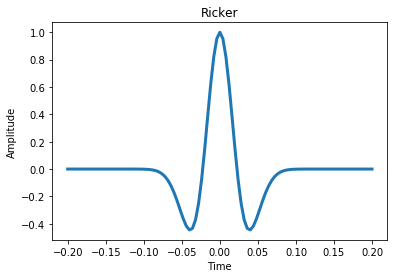

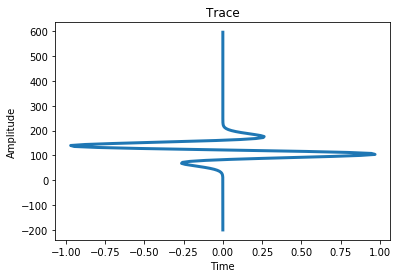

In [20]:
# -----------------------------------------------------------------------------
# interference.py
# ----------------------------------------------------------------------------- 
"""
Author:     Jesse M. Kinder
Created:    2016 Apr 15
Modified:   2016 Apr 15

Description
-----------
Build a GUI wrapper to explore the interference pattern of two waves.
"""
try:
    # This will work in Python 2.7
    import Tkinter
except ImportError:
    # This will work in Python 3.5
    import tkinter as Tkinter

# -----------------------------------------------------------------------------
# To use matplotlib, the author must use the TkAgg backend, or none of this will
# work and a long string of inexplicable error messages will ensue.
# ----------------------------------------------------------------------------- 
import matplotlib
matplotlib.use('TkAgg')
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from math import *

# Define a bold font:
BOLD = ('Courier', '24', 'bold')

# Create main application window.
root = Tkinter.Tk()

# Create a text box explaining the application.
greeting = Tkinter.Label(text="Create an Interference Pattern", font=BOLD)
greeting.pack(side='top')

# Create a frame for variable names and entry boxes for their values.
frame = Tkinter.Frame(root)
frame.pack(side='top')

# Variables for the calculation, and default values.
Length = Tkinter.StringVar()
Length.set('400')
Freq = Tkinter.StringVar()
Freq.set('10')

Samp = Tkinter.StringVar()
Samp.set('4')
Phase = Tkinter.StringVar()
Phase.set('0')

# Create text boxes and entry boxes for the variables.
# Use grid geometry manager instead of packing the entries in.
row_counter = 0
aa_text = Tkinter.Label(frame, text='Length:') 
aa_text.grid(row=row_counter, column=0)

aa_entry = Tkinter.Entry(frame, width=8, textvariable=Length)
aa_entry.grid(row=row_counter, column=1)

row_counter += 1
fa_text = Tkinter.Label(frame, text='Frequency:') 
fa_text.grid(row=row_counter, column=0)

fa_entry = Tkinter.Entry(frame, width=8, textvariable=Freq)
fa_entry.grid(row=row_counter, column=1)

row_counter += 1
ab_text = Tkinter.Label(frame, text='Sampling rate:') 
ab_text.grid(row=row_counter, column=0)

ab_entry = Tkinter.Entry(frame, width=8, textvariable=Samp)
ab_entry.grid(row=row_counter, column=1)

row_counter += 1
fb_text = Tkinter.Label(frame, text='Phase:') 
fb_text.grid(row=row_counter, column=0)

fb_entry = Tkinter.Entry(frame, width=8, textvariable=Phase)
fb_entry.grid(row=row_counter, column=1)

# Define a function to create the desired plot.
def make_trace():
    # Get these variables from outside the function, and update them.
    global Length, Freq, Samp, Phase

    # Convert StringVar data to numerical data.
    l = float(Length.get())
    fo = float(Freq.get())
    s = float(Samp.get())
    w = float(Phase.get())

    t = np.arange(-l/2000, (l/2000) + (s/1000), s/1000)
    o1 = 2*np.pi*fo
    y = (1.0-0.5*(o1**2*t**2))*np.exp(-0.25*o1**2*t**2)
    w = w*np.pi/180 #radian
    x = hilbert(y)
    x2 = cos(w)*x.real-sin(w)*x.imag
    
    # Create the plot.
    plt.figure()
    plt.plot(t, x2, lw=3)
    plt.title('Ricker')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

# Define a function to create the desired plot.
def trace(event=None):
    # Get these variables from outside the function, and update them.
    global Length, Freq, Samp, Phase

    # Convert StringVar data to numerical data.
    l = float(Length.get())
    fo = float(Freq.get())
    s = float(Samp.get())
    w = float(Phase.get())

    t = np.arange(-l/2000, (l/2000) + (s/1000), s/1000)
    o1 = 2*np.pi*fo
    y = (1.0-0.5*(o1**2*t**2))*np.exp(-0.25*o1**2*t**2)
    w = w*np.pi/180 #radian
    x = hilbert(y)
    x2 = cos(w)*x.real-sin(w)*x.imag
    
    #Reflectivity
    rho1 = 2.2
    rho2 = 2.4
    v1 = 2000
    v2 = 2400
    gain = 3
    
    #Reflectivity Formula
    r1 = (rho2*v2-rho1*v1)/(rho2*v2+rho1*v1)
    r2 = (rho1*v1-rho2*v2)/(rho2*v2+rho1*v1)
    
    trseis = np.arange(0,100+(l/4),1) #time length
    tr1 = 0*np.arange(0,98,1)
    yr1 = np.insert(tr1,30,r1*10*gain) #insert reflectivity
    
    x11 = []
    y11 = []
    
    yr = np.insert(yr1,30+1,r2*10*gain) #insert reflectivity
    seis = np.convolve(x2,yr)
    ytrses = trseis*4-(l/2)
    
    
    # Create the plot.
    plt.figure()
    plt.plot(seis, ytrses, lw=3)
    plt.title('Trace')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

# Add a button to create the plot.
MakePlot = Tkinter.Button(root, command=trace, text="Create Trace")
MakePlot.pack(side='bottom', fill='both')
Trace = Tkinter.Button(root, command=make_trace, text="Create Ricker")
Trace.pack(side='bottom')
    
# Allow pressing <Return> to create plot.
root.bind('<Return>', make_trace)

# Allow pressing <Esc> to close the window.
root.bind('<Escape>', root.destroy)

# Activate the window.
root.mainloop()